In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [16]:
import pandas as pd
data = pd.read_csv("/content/House_Pricing.csv")
data.head()


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [17]:
data.shape

(21613, 21)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [19]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [20]:
data.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [21]:
#Data Cleaning
'''
1.Remove Duplicate Values
2.Remove Unnecessary Columns
3.Replace null values with mean,median or mode
'''

'\n1.Remove Duplicate Values\n2.Remove Unnecessary Columns\n3.Replace null values with mean,median or mode\n'

In [22]:
data['ID'].value_counts()


ID
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

In [23]:
# Find rows with duplicate values in column 'A'
duplicate_rows = data[data.duplicated(subset=['ID'], keep=False)]
duplicate_rows


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
93,6021501535,14 July 2017,430000.0,3,1.50,1580.0,5000.0,1.0,No,NaN,...,8,1290.0,290,79,0,98117.0,47.6870,-122.386,1570.0,4500
94,6021501535,14 December 2017,700000.0,3,1.50,1580.0,5000.0,1.0,No,NaN,...,8,1290.0,290,79,0,98117.0,47.6870,-122.386,1570.0,4500
313,4139480200,14 June 2017,1380000.0,4,3.25,4290.0,12103.0,1.0,No,Thrice,...,10,2690.0,1600,21,0,98006.0,47.5503,-122.102,3860.0,11244
314,4139480200,14 December 2017,1400000.0,4,3.25,4290.0,12103.0,1.0,No,Thrice,...,10,2690.0,1600,21,0,98006.0,47.5503,-122.102,3860.0,11244
324,7520000520,14 September 2017,232000.0,2,1.00,1240.0,12092.0,1.0,No,NaN,...,6,960.0,280,96,1984,98146.0,47.4957,-122.352,1820.0,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,15 March 2016,502000.0,4,2.50,2680.0,5539.0,2.0,No,NaN,...,8,2680.0,0,5,0,98045.0,47.4759,-121.734,2680.0,5992
20779,6300000226,14 June 2017,240000.0,4,1.00,1200.0,2171.0,1.5,No,NaN,...,7,1200.0,0,85,0,98133.0,47.7076,-122.342,1130.0,1598
20780,6300000226,15 May 2016,380000.0,4,1.00,1200.0,2171.0,1.5,No,NaN,...,7,1200.0,0,85,0,98133.0,47.7076,-122.342,1130.0,1598
21580,7853420110,14 October 2017,594866.0,3,3.00,2780.0,6000.0,2.0,No,NaN,...,9,2780.0,0,5,0,98065.0,47.5184,-121.886,2850.0,6000


In [24]:
# it is seen that house id's are repeated multiple times. since it has different selling dates, we can assume that it could have been sold multiple times

In [25]:
#replacing null values

In [26]:
data.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [41]:
data['Living Area after Renovation (in Sqft)'].fillna(data['Living Area after Renovation (in Sqft)'].mode()[0],inplace=True)


<Axes: xlabel='Sale Price', ylabel='Count'>

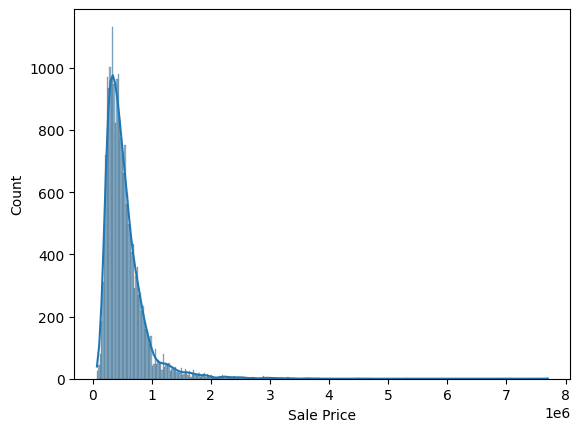

In [27]:
sns.histplot(data['Sale Price'],kde=True)

In [28]:
#since graph shows a normal distribution, null values can be replaced by mean

<Axes: xlabel='No of Bathrooms', ylabel='Count'>

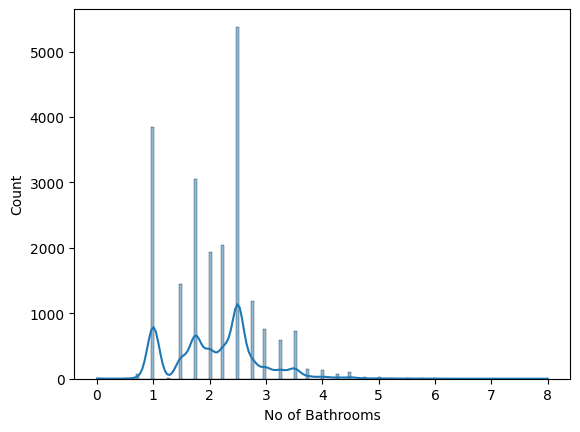

In [29]:
sns.histplot(data['No of Bathrooms'],kde=True)

In [30]:
#since graph doesn't show a normal distribution, null values should be replaced by median

<Axes: xlabel='Flat Area (in Sqft)', ylabel='Count'>

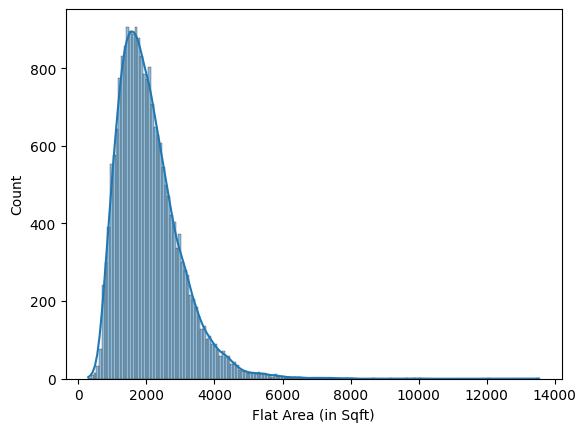

In [31]:
sns.histplot(data['Flat Area (in Sqft)'],kde=True)

In [32]:
#Normal - mean

<Axes: xlabel='Lot Area (in Sqft)', ylabel='Count'>

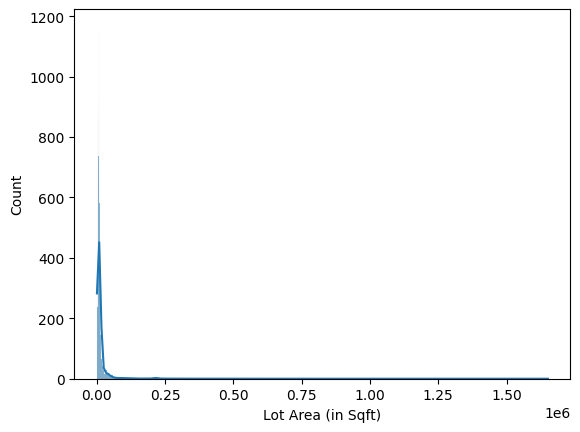

In [33]:
sns.histplot(data['Lot Area (in Sqft)'],kde=True)

In [34]:
#Lot Area (in Sqft)-take median

<Axes: xlabel='Area of the House from Basement (in Sqft)', ylabel='Count'>

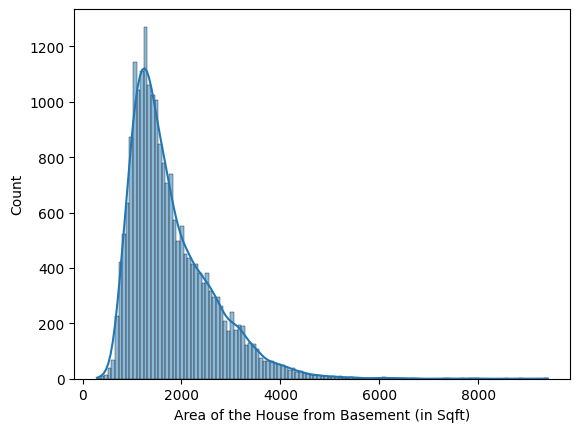

In [35]:
sns.histplot(data['Area of the House from Basement (in Sqft)'],kde=True)

In [36]:
#mean


In [46]:
data['Area of the House from Basement (in Sqft)'].fillna(data['Area of the House from Basement (in Sqft)'].mean(), inplace=True)
data['Sale Price'].fillna(data['Sale Price'].mean(), inplace=True)
data['Flat Area (in Sqft)'].fillna(data['Flat Area (in Sqft)'].mean(), inplace=True)
data['No of Bathrooms'].fillna(data['No of Bathrooms'].median(), inplace=True)
data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].median(), inplace=True)
data['Latitude'].fillna(data['Latitude'].mean(), inplace=True)
data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)
data['Zipcode'].fillna(data['Zipcode'].mean(), inplace=True)
data['Living Area after Renovation (in Sqft)'].fillna(data['Living Area after Renovation (in Sqft)'].mode()[0],inplace=True)
data.drop('No of Times Visited', axis=1, inplace=True)#since column 'No of Times Visited' has null values as majority, we can drop the column



data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [49]:
data.nunique()

ID                                           21436
Date House was Sold                             13
Sale Price                                    3626
No of Bedrooms                                  13
No of Bathrooms                                 30
Flat Area (in Sqft)                           1037
Lot Area (in Sqft)                            9779
No of Floors                                     6
Waterfront View                                  2
Condition of the House                           5
Overall Grade                                   10
Area of the House from Basement (in Sqft)      947
Basement Area (in Sqft)                        306
Age of House (in Years)                        116
Renovated Year                                  70
Zipcode                                         71
Latitude                                      5035
Longitude                                      753
Living Area after Renovation (in Sqft)         777
Lot Area after Renovation (in S

In [48]:
data.shape

(21613, 20)

In [50]:
data.ID.unique()

array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157])

In [51]:
data.ID.value_counts()

ID
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

In [52]:
data.ID.nunique()

21436

In [ ]:
#Label Encoder

In [54]:
label_encoder = LabelEncoder()
data['ID_encoded'] = label_encoder.fit_transform(data['ID'])
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ID_encoded
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,15339
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,14466
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,13503
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,6371
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,4955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,...,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,574
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,...,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,14564
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,...,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,3621
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,...,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,629


In [55]:
data.ID_encoded.nunique()

21436

In [56]:
categorical_cols = ['Waterfront View','Condition of the House']
numerical_cols = ['Sale Price','No of Bedrooms','Flat Area (in Sqft)','Age of House (in Years)']

In [57]:
data_encoded = pd.get_dummies(data, columns=categorical_cols,dtype=int,drop_first=True)
data_encoded.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ID_encoded,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,...,47.5112,-122.257,1340.0,5650,15339,0,0,1,0,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,...,47.7210,-122.319,1690.0,7639,14466,0,0,1,0,0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,...,47.7379,-122.233,2720.0,8062,13503,0,0,1,0,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,...,47.5208,-122.393,1360.0,5000,6371,0,1,0,0,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,...,47.6168,-122.045,1800.0,7503,4955,0,0,1,0,0


In [58]:
data_encoded.shape

(21613, 24)

In [59]:
data_std_scaled = data_encoded.copy()

std_scaler = StandardScaler()
data_std_scaled[numerical_cols] = std_scaler.fit_transform(data_std_scaled[numerical_cols])
data_std_scaled.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ID_encoded,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,14 October 2017,-0.866480,-0.398737,1.00,-0.980024,5650.0,1.0,7,1180.0,...,47.5112,-122.257,1340.0,5650,15339,0,0,1,0,0
1,6414100192,14 December 2017,-0.005985,-0.398737,2.25,0.533683,7242.0,2.0,7,2170.0,...,47.7210,-122.319,1690.0,7639,14466,0,0,1,0,0
2,5631500400,15 February 2016,-0.980541,-1.473959,1.00,-1.426513,10000.0,1.0,6,770.0,...,47.7379,-122.233,2720.0,8062,13503,0,0,1,0,0
3,2487200875,14 December 2017,0.173682,0.676485,3.00,-0.130605,5000.0,1.0,7,1050.0,...,47.5208,-122.393,1360.0,5000,6371,0,1,0,0,0
4,1954400510,15 February 2016,-0.082207,-0.398737,2.00,-0.435525,8080.0,1.0,8,1680.0,...,47.6168,-122.045,1800.0,7503,4955,0,0,1,0,0


In [60]:
data_std_scaled.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ID_encoded,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
count,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,-4.734102e-17,2.367051e-16,2.114757,-1.183526e-16,1.510464e+04,1.494309,7.623467,1788.344193,291.509045,...,47.560048,-122.213892,1986.518253,12768.455652,10716.562162,0.007542,0.078703,0.649193,0.262759,0.007958
std,2.876566e+09,1.000023e+00,1.000023e+00,0.770069,1.000023e+00,4.141992e+04,0.539989,1.105439,827.925135,442.575043,...,0.138562,0.140827,685.395128,27304.179631,6188.333439,0.086517,0.269280,0.477234,0.440143,0.088855
min,1.000102e+06,-1.266375e+00,-3.624404e+00,0.000000,-1.949233e+00,5.200000e+02,1.000000,1.000000,290.000000,0.000000,...,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,-5.939853e-01,-3.987371e-01,1.750000,-7.077746e-01,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,...,47.471000,-122.328000,1490.000000,5100.000000,5354.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,-2.455405e-01,-3.987371e-01,2.250000,-1.850554e-01,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,...,47.571800,-122.230000,1840.000000,7620.000000,10720.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.308900e+09,2.852935e-01,6.764851e-01,2.500000,5.119035e-01,1.068500e+04,2.000000,8.000000,2210.000000,560.000000,...,47.678000,-122.125000,2360.000000,10083.000000,16078.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9.900000e+09,1.949059e+01,3.185793e+01,8.000000,1.247999e+01,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,...,47.777600,-121.315000,6210.000000,871200.000000,21435.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
data_minmax_scaled = data_encoded.copy()

minmax_scaler = MinMaxScaler()
data_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(data_minmax_scaled[numerical_cols])
data_minmax_scaled.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ID_encoded,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,14 October 2017,0.019266,0.090909,1.00,0.067170,5650.0,1.0,7,1180.0,...,47.5112,-122.257,1340.0,5650,15339,0,0,1,0,0
1,6414100192,14 December 2017,0.060721,0.090909,2.25,0.172075,7242.0,2.0,7,2170.0,...,47.7210,-122.319,1690.0,7639,14466,0,0,1,0,0
2,5631500400,15 February 2016,0.013770,0.060606,1.00,0.036226,10000.0,1.0,6,770.0,...,47.7379,-122.233,2720.0,8062,13503,0,0,1,0,0
3,2487200875,14 December 2017,0.069377,0.121212,3.00,0.126038,5000.0,1.0,7,1050.0,...,47.5208,-122.393,1360.0,5000,6371,0,1,0,0,0
4,1954400510,15 February 2016,0.057049,0.090909,2.00,0.104906,8080.0,1.0,8,1680.0,...,47.6168,-122.045,1800.0,7503,4955,0,0,1,0,0


In [62]:
data_minmax_scaled.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ID_encoded,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,0.061010,0.102147,2.114757,0.135089,1.510464e+04,1.494309,7.623467,1788.344193,291.509045,...,47.560048,-122.213892,1986.518253,12768.455652,10716.562162,0.007542,0.078703,0.649193,0.262759,0.007958
std,2.876566e+09,0.048178,0.028184,0.770069,0.069305,4.141992e+04,0.539989,1.105439,827.925135,442.575043,...,0.138562,0.140827,685.395128,27304.179631,6188.333439,0.086517,0.269280,0.477234,0.440143,0.088855
min,1.000102e+06,0.000000,0.000000,0.000000,0.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,...,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,0.032393,0.090909,1.750000,0.086038,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,...,47.471000,-122.328000,1490.000000,5100.000000,5354.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,0.049180,0.090909,2.250000,0.122264,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,...,47.571800,-122.230000,1840.000000,7620.000000,10720.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.308900e+09,0.074754,0.121212,2.500000,0.170566,1.068500e+04,2.000000,8.000000,2210.000000,560.000000,...,47.678000,-122.125000,2360.000000,10083.000000,16078.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9.900000e+09,1.000000,1.000000,8.000000,1.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,...,47.777600,-121.315000,6210.000000,871200.000000,21435.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
corr_cols = ['Sale Price','No of Bedrooms','Flat Area (in Sqft)','Age of House (in Years)']
ori_data_corr = data_encoded[corr_cols].corr()
ori_data_corr.head()

,Sale Price,No of Bedrooms,Flat Area (in Sqft),Age of House (in Years)
Sale Price,1.000000,0.308386,0.702012,-0.054029
No of Bedrooms,0.308386,1.000000,0.576558,-0.154178
Flat Area (in Sqft),0.702012,0.576558,1.000000,-0.318112
Age of House (in Years),-0.054029,-0.154178,-0.318112,1.000000


In [64]:
stdscaled_data_corr = data_std_scaled[corr_cols].corr()
stdscaled_data_corr.head()

,Sale Price,No of Bedrooms,Flat Area (in Sqft),Age of House (in Years)
Sale Price,1.000000,0.308386,0.702012,-0.054029
No of Bedrooms,0.308386,1.000000,0.576558,-0.154178
Flat Area (in Sqft),0.702012,0.576558,1.000000,-0.318112
Age of House (in Years),-0.054029,-0.154178,-0.318112,1.000000


In [65]:
minmaxscaled_data_corr = data_minmax_scaled[corr_cols].corr()
minmaxscaled_data_corr.head()

,Sale Price,No of Bedrooms,Flat Area (in Sqft),Age of House (in Years)
Sale Price,1.000000,0.308386,0.702012,-0.054029
No of Bedrooms,0.308386,1.000000,0.576558,-0.154178
Flat Area (in Sqft),0.702012,0.576558,1.000000,-0.318112
Age of House (in Years),-0.054029,-0.154178,-0.318112,1.000000


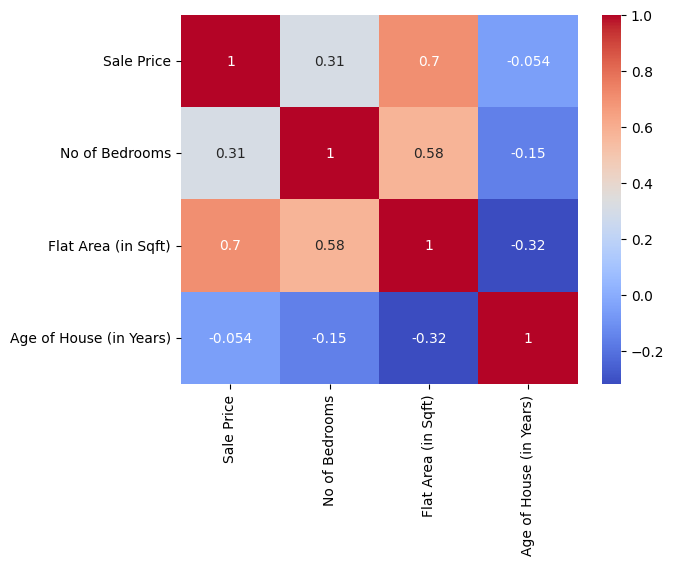

In [66]:
sns.heatmap(ori_data_corr,annot=True,cmap='coolwarm')
plt.show()